# Кластеризация


Источник данных: все данные были созданы на основе данных следующего источника: 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

#### Цель - найти похожие между собой страны и регионы, экспериментируя с различным количеством кластеров.
----

## Импорт библиотек и загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CIA_Country_Facts.csv')

## Исследование данных

In [4]:
df.head(4)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

## Визуализация данных

In [48]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

#### Гистограмма для колонки Population

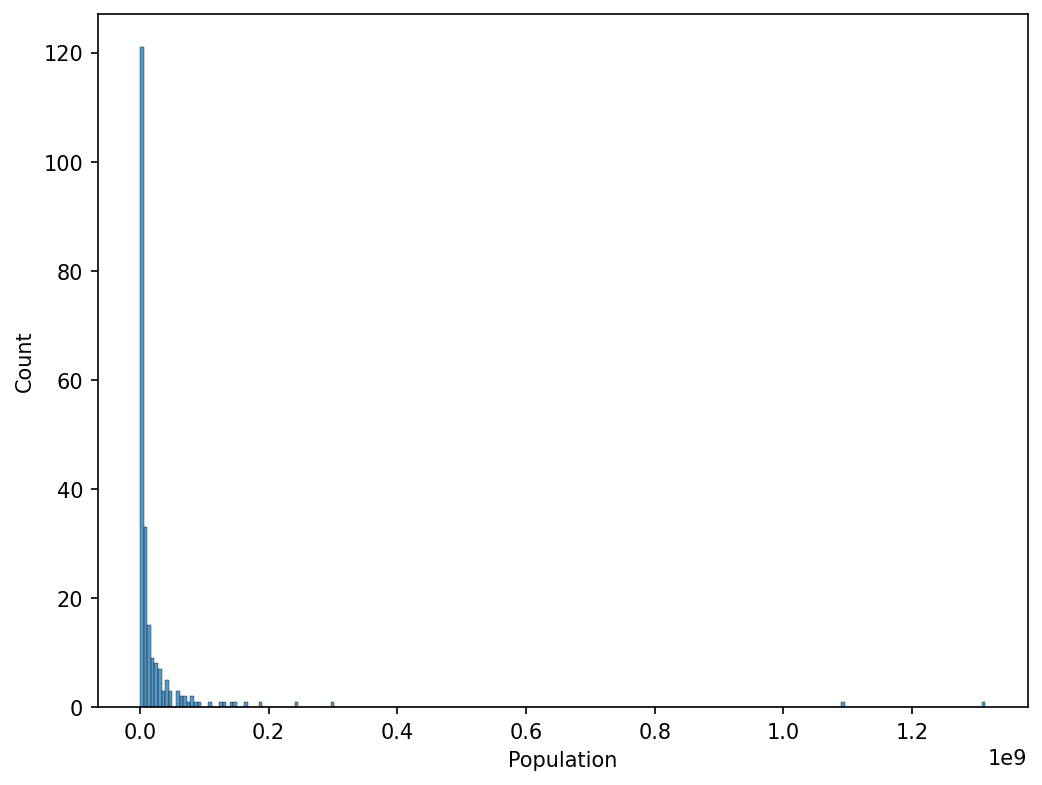

In [25]:
plt.figure (figsize=(8,6), dpi = 150)
sns.histplot(data = df, x ='Population');

* Гистограмма очень перекошена из-за нескольких очень больших стран. Рассмотрим только страны с населением меньше 0.5 миллиарда людей.

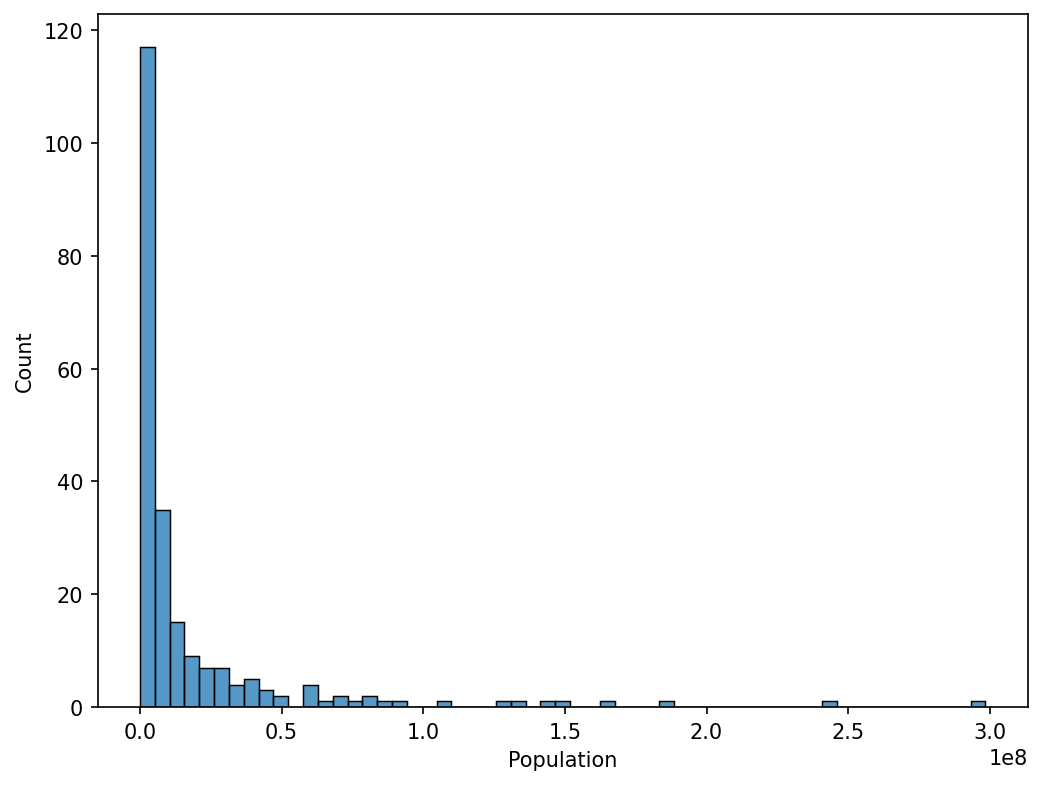

In [30]:
#df[df['Population'] < 500000000]

plt.figure (figsize=(8,6), dpi = 150)
sns.histplot(data = df[df['Population'] < 500000000], x ='Population');

#### График ВВП на душу населения (GDP per Capita) для каждого региона

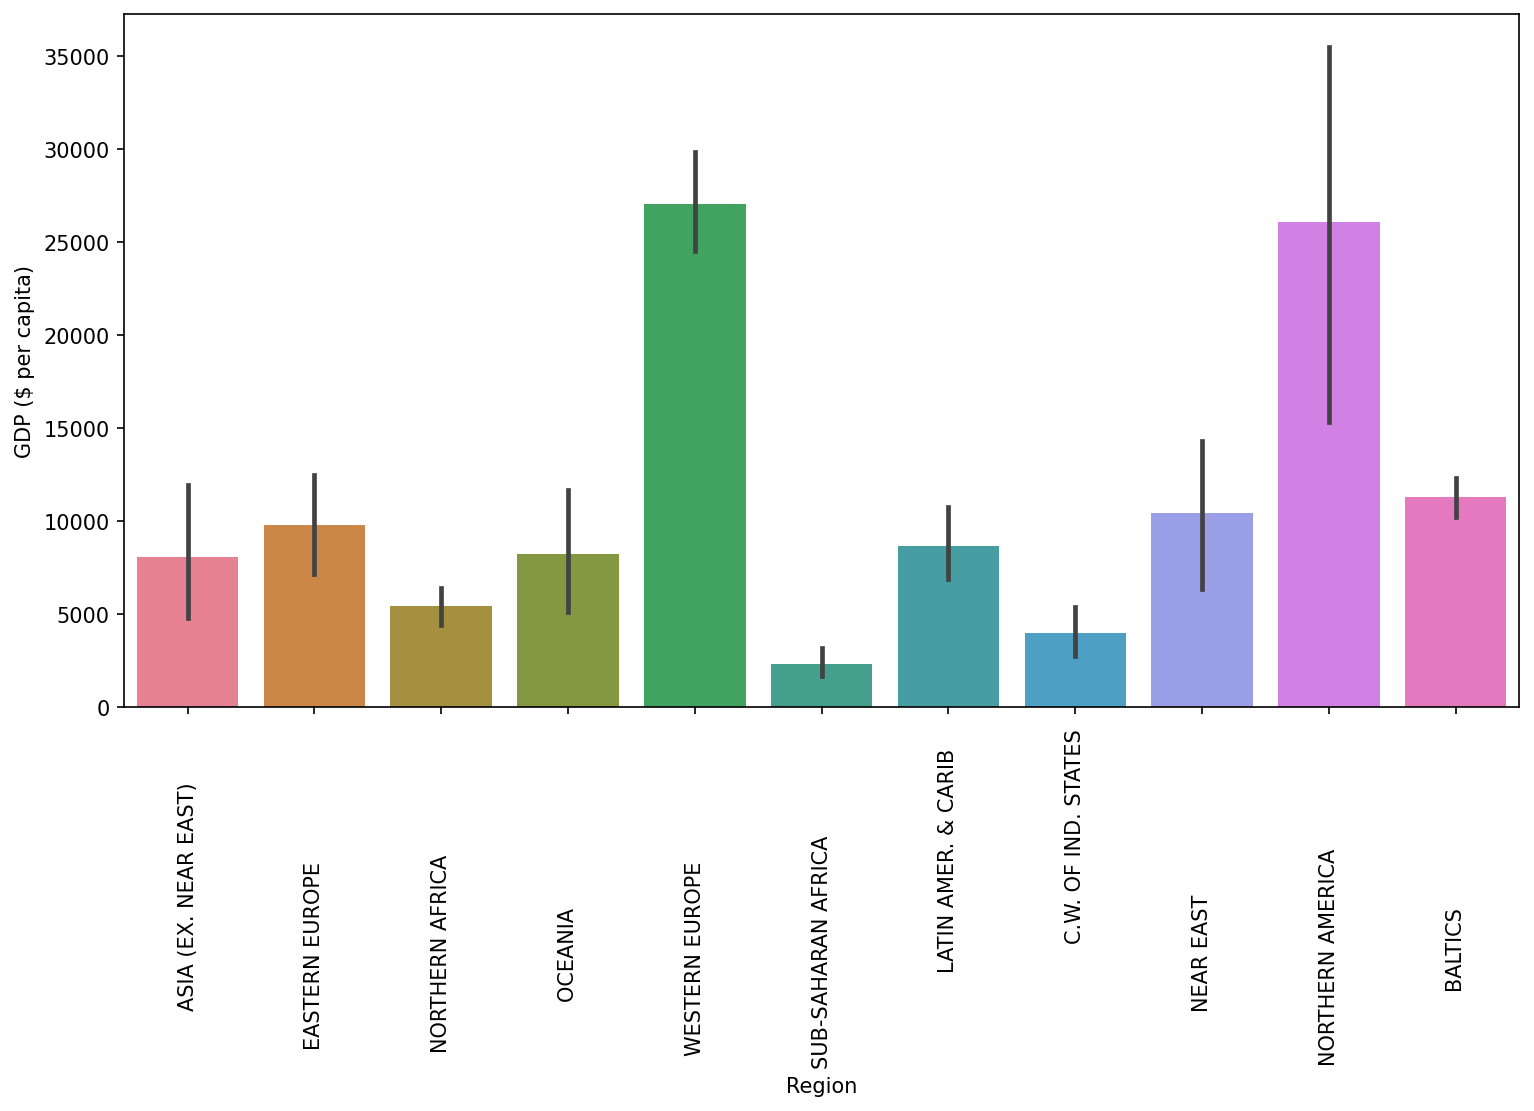

In [39]:
plt.figure (figsize=(12,6), dpi = 150)
sns.barplot(data = df, x ='Region', y = 'GDP ($ per capita)', hue = 'Region')
plt.xticks(rotation= 90);

* Два региона с существенно большими значеними ВВП на душу населения - это Western Europe (Восточная Европа) и Nothern America (Северная Америка). 
* Самое большое среднеквадратическое отклонение в Nothern America (Северная Америка).  

#### График для визуализации связи между колонками "кол-во телефонов на одну тысячу человек" и "ВВП на душу населения"

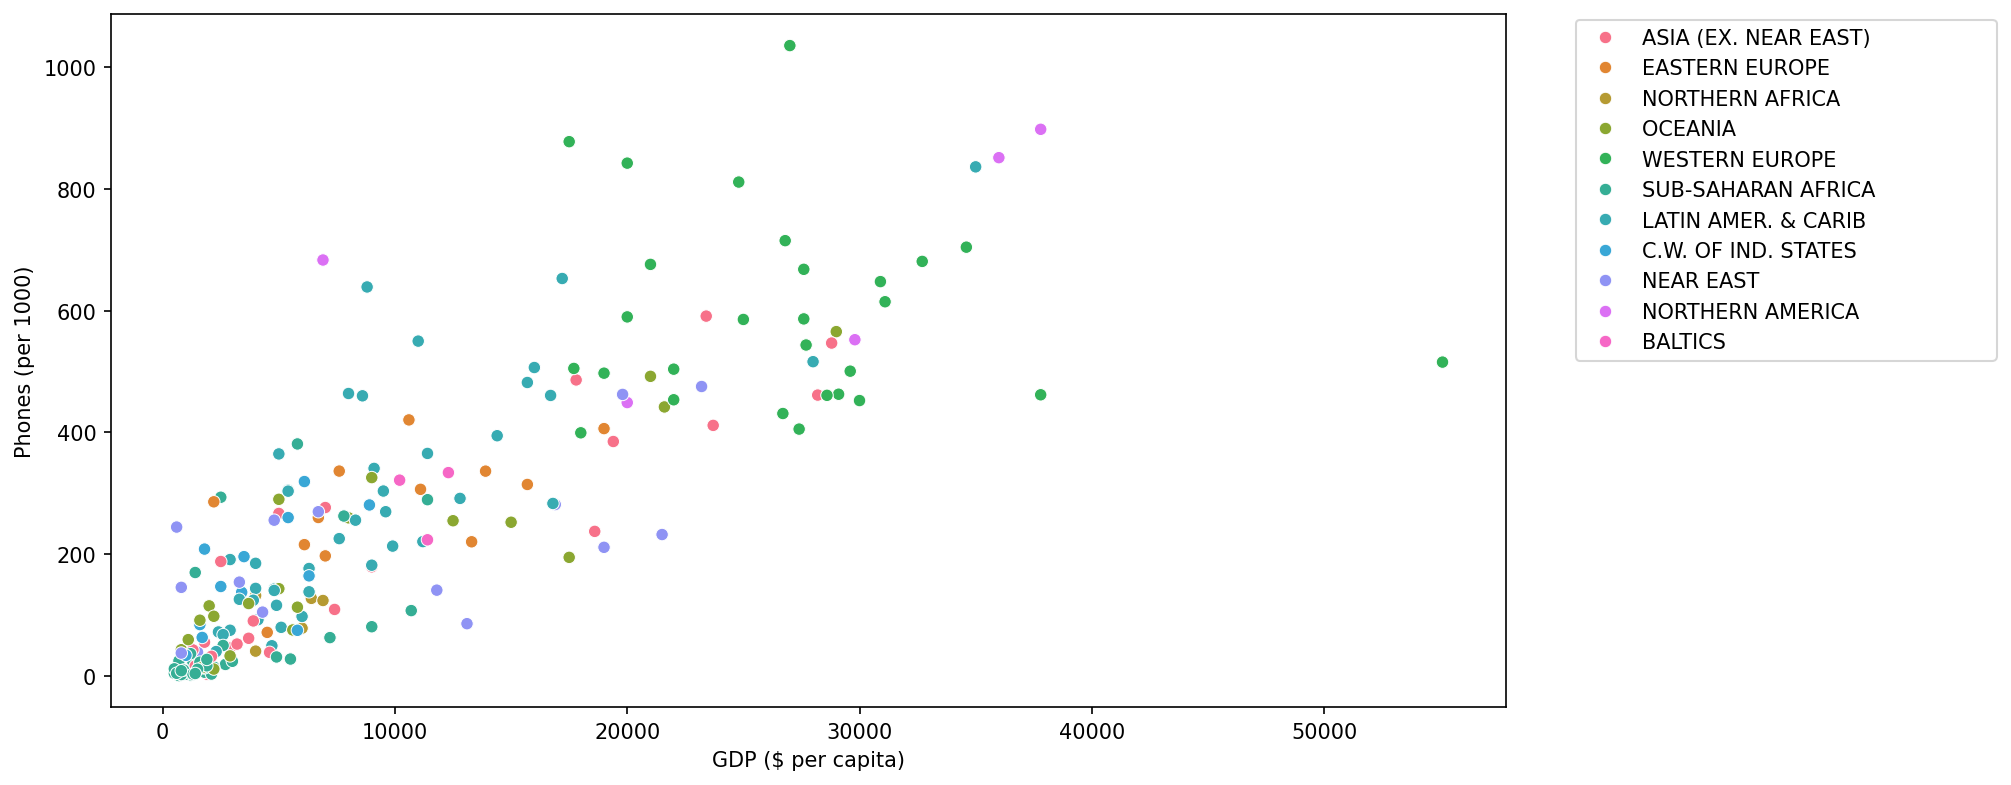

In [49]:
plt.figure (figsize=(12,6), dpi = 150)
sns.scatterplot(data = df, y ='Phones (per 1000)', x = 'GDP ($ per capita)', hue = 'Region')
plt.legend(loc=(1.05,0.5));

* Относительно линейная зависимость - чем больше в регионе ВВП, тем больше у людей телефонов.
* Есть выбросы. Найдем их.


In [56]:
x = df[df['Phones (per 1000)'] > 1000]
x

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
138,Monaco,WESTERN EUROPE,32543,2,16271.5,205.0,7.75,5.43,27000.0,99.0,1035.6,0.0,0.0,100.0,NaN,9.19,12.91,0.17,NaN,NaN


* Монако - страна с небольшим количеством ВВП и большим количеством телефонов у людей.

In [57]:
x = df[df['GDP ($ per capita)'] > 50000]
x

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
121,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.0,8.97,4.81,55100.0,100.0,515.4,23.28,0.4,76.32,NaN,11.94,8.41,0.01,0.13,0.86


* Страна с максимальным ВВП и небольшим количеством телефонов.

#### График для визуализации связи между ВВП на душу населения и грамотностью

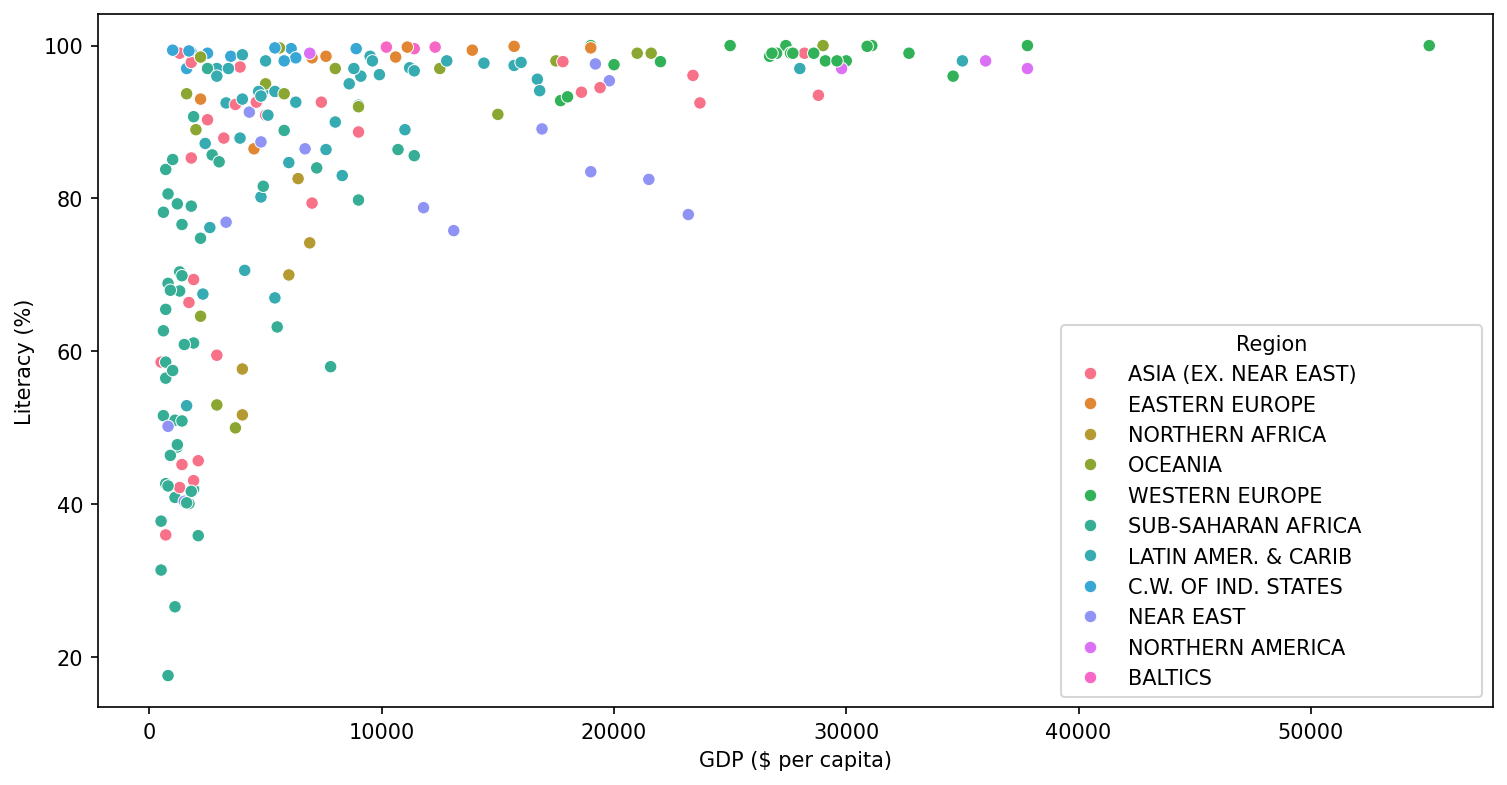

In [47]:
plt.figure (figsize=(12,6), dpi = 150)
sns.scatterplot(data = df, y ='Literacy (%)', x = 'GDP ($ per capita)', hue = 'Region');

* В странах с низким уровнем ВВП процент грамотности может быть самым разным, поэтому ВВП в этом деле не показатель.

##### График clustermap для корреляций между колонками датафрейма

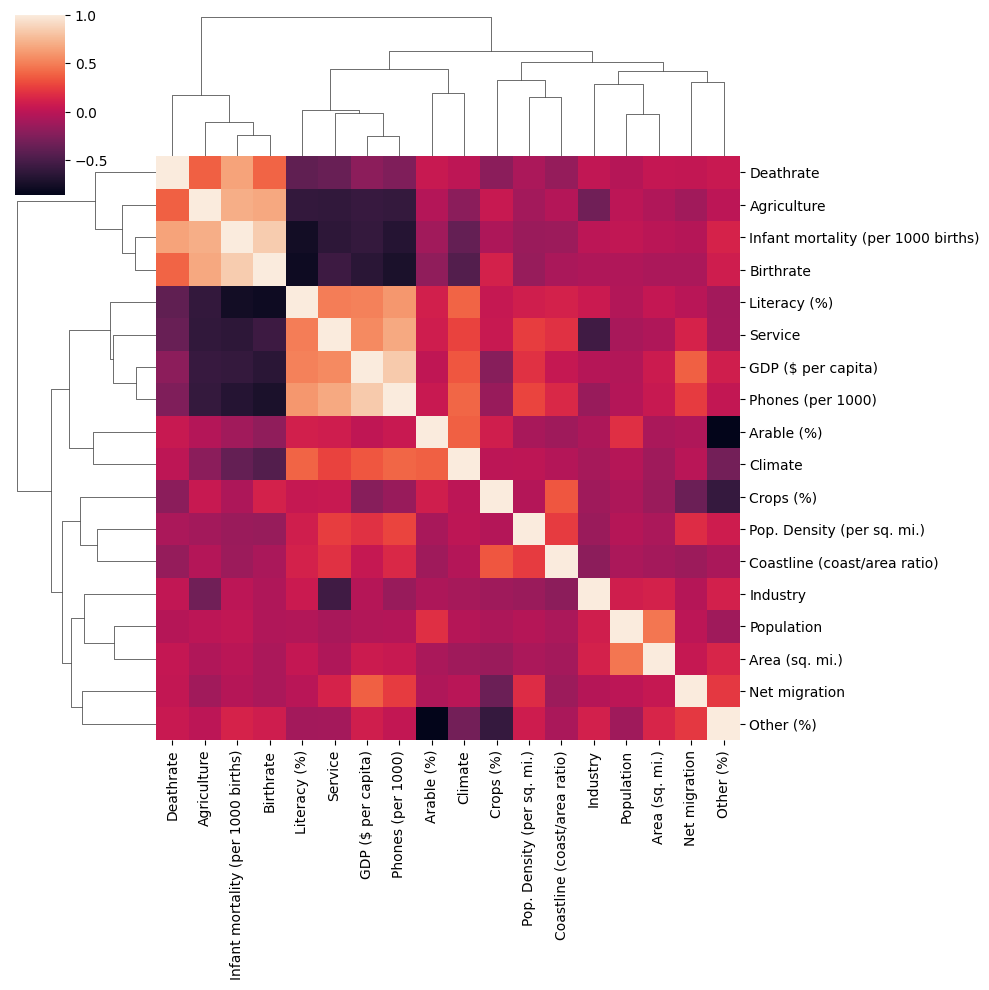

In [62]:
sns.clustermap(df.corr(numeric_only=True));

-----

## Подготовка данных и модель данных

### Отсутствующие данные

In [71]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

* Рассмотрим подробнее страны, где в колонке Agriculture значения NaN.

In [75]:
df [df['Agriculture'] .isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

* Многие из этих стран являются островами, на которых нет развитой агрокультуры.
* Можно сделать вывод, что для многих этих стран колонка с Агркультурой незначительна (можем приравнять 0).

In [76]:
df [df['Agriculture'] .isnull()] = df [df['Agriculture'] .isnull()].fillna(0)

In [78]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

* Замена отсутствующих значений колонки Climate на средние значения этой колонки, где усреднение выполняется для соответствующего региона:


In [79]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

* Замена отсутствующих значений колонки Literacy на средние значения этой колонки, где усреднение выполняется для соответствующего региона:

In [80]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

In [81]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

In [82]:
df = df.dropna()

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             221 non-null    object 
 1   Region                              221 non-null    object 
 2   Population                          221 non-null    int64  
 3   Area (sq. mi.)                      221 non-null    int64  
 4   Pop. Density (per sq. mi.)          221 non-null    float64
 5   Coastline (coast/area ratio)        221 non-null    float64
 6   Net migration                       221 non-null    float64
 7   Infant mortality (per 1000 births)  221 non-null    float64
 8   GDP ($ per capita)                  221 non-null    float64
 9   Literacy (%)                        221 non-null    float64
 10  Phones (per 1000)                   221 non-null    float64
 11  Arable (%)                          221 non-null  

### Подготовка данных с признаками

In [87]:
df.head(3)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298


* Колонка Country является уникальным идентификатором, поэтому она не будет полезной для кластеризации, поскольку содержит уникальные значения для каждой строки.

In [91]:
X = df.drop('Country', axis = 1)

In [92]:
X = pd.get_dummies(X)

### Масштабирование данных

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()

In [97]:
X_sc = scaler.fit_transform(X)

### Создание и обучение модели Kmeans

* Цикл для создания и обучения нескольких моделей KMeans, проверим количество кластеров K от 2 до 30.

In [98]:
from sklearn.cluster import KMeans 

In [100]:
import warnings
warnings.filterwarnings('ignore')

In [101]:
ssd = []

for n in range (2, 30):
    model = KMeans(n_clusters = n)
    model.fit(X_sc)
    ssd.append (model.inertia_)

* Нанесем данные на график, изображая метрику SSD для различных значений К:

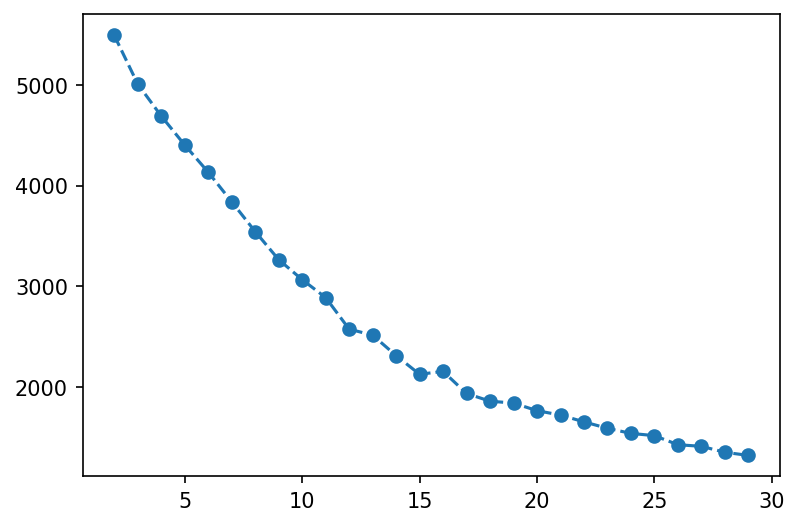

In [111]:
plt.figure(figsize=(6, 4), dpi = 150)
plt.plot(range(2,30), ssd, 'o--');

* График barplot с изменениями метрики SSD:

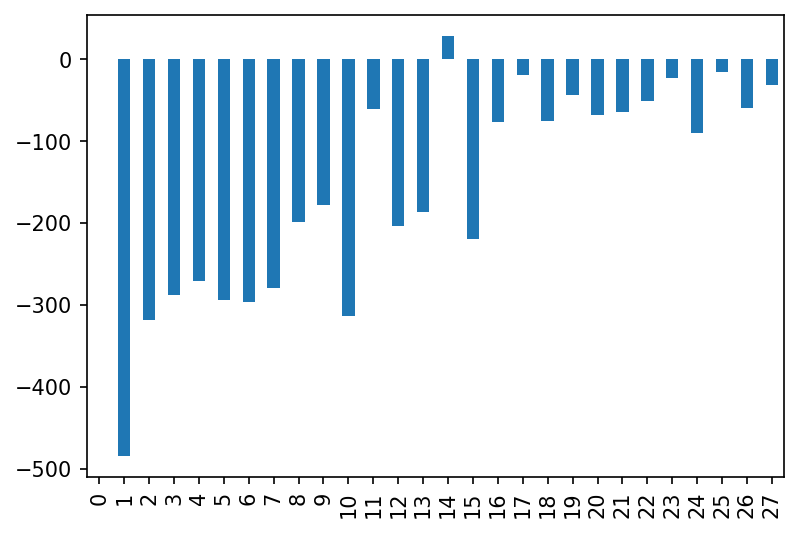

In [114]:
plt.figure(figsize=(6, 4), dpi = 150)
pd.Series(ssd).diff().plot(kind='bar'); 

-----

#### Выбираем количество кластеров n = 3

* Можно сказать, что в точке n = 3 падение метрики SSD более пологое (хотя метрика продолжает уменьшаться после этой точки). Посмотрим, какие признаки являются важными в случае 3 кластеров.

In [115]:
model = KMeans (n_clusters= 3)

In [116]:
model.fit(X_sc)

KMeans(n_clusters=3)

In [118]:
model.labels_

array([2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2,
       1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       1, 0, 0, 2, 2, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2,
       1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2,
       0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2])

In [119]:
X['N clusters = 3'] = model.labels_

In [124]:
X.corr()['N clusters = 3'].sort_values()

Region_LATIN AMER. & CARIB                   -0.379921
Literacy (%)                                 -0.359824
Crops (%)                                    -0.238268
Region_OCEANIA                               -0.232675
Region_NEAR EAST                             -0.210159
Region_C.W. OF IND. STATES                   -0.181682
Coastline (coast/area ratio)                 -0.144227
Region_NORTHERN AFRICA                       -0.143868
Phones (per 1000)                            -0.139122
Service                                      -0.099136
Population                                   -0.085164
Region_ASIA (EX. NEAR EAST)                  -0.082214
Industry                                     -0.042678
Area (sq. mi.)                               -0.032464
Region_NORTHERN AMERICA                      -0.018208
GDP ($ per capita)                           -0.009047
Pop. Density (per sq. mi.)                    0.015392
Arable (%)                                    0.022441
Region_BAL

---